<a href="https://colab.research.google.com/github/amyssnippet/weatherapp1/blob/main/cat-2d-grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Image Compression using Quantum Inspired Principal Component Analysis

Step 1 : Installing Required Libraries

In [1]:
!pip install numpy pillow qiskit matplotlib scipy scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.8 MB/s eta 0:00:00


Step 2 : Importing all Libraries

In [2]:
import numpy as np
from PIL import Image
from qiskit.quantum_info import Statevector, DensityMatrix
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from skimage.metrics import structural_similarity as ssim
import math

Step 3 : Loading the Image, converting it to Grayscale and resizing it to a specific pixel value like 94 x 94.

The pixel values range from the 0 to 255 and 0 represent dark and 255 represent bright spots in the image for a grayscale image.

In [9]:
# Step 1: Load and preprocess image
img = Image.open("Turkish_Van_Cat.jpg").convert("L").resize((94, 94))  # Grayscale and resize
print("Original Image:", img)
data = np.array(img, dtype=np.float32) / 255.0
print("NOrmalized Image (Image/255):", data)
original = data.copy()

Original Image: <PIL.Image.Image image mode=L size=94x94 at 0x7D23AC0FD750>
NOrmalized Image (Image/255): [[0.         0.         0.         ... 0.3019608  0.30588236 0.30588236]
 [0.         0.         0.         ... 0.30588236 0.3019608  0.3019608 ]
 [0.00784314 0.00392157 0.         ... 0.30588236 0.30588236 0.30588236]
 ...
 [0.4862745  0.42745098 0.3764706  ... 0.3529412  0.3019608  0.25882354]
 [0.3254902  0.38431373 0.37254903 ... 0.32156864 0.30588236 0.28235295]
 [0.39607844 0.37254903 0.34901962 ... 0.31764707 0.30588236 0.29803923]]


In [11]:

# Step 2: Flatten and normalize image into quantum state (amplitude encoding)
flat = data.flatten()
flat = flat / np.linalg.norm(flat)
print("Image Matrix Flattened to 1D", flat)
state = Statevector(flat)
print("State Vector",state)

Image Matrix Flattened to 1D [0.         0.         0.         ... 0.00551573 0.00531144 0.00517525]
State Vector Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j, ...,
             0.00551573+0.j, 0.00531144+0.j, 0.00517525+0.j],
            dims=(8836,))


In [12]:
# Step 3: Get density matrix ρ = |ψ⟩⟨ψ|
rho = DensityMatrix(state).data
print("Density Matrix", rho)

Density Matrix [[0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 ...
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  3.04232364e-05+0.j 2.92964504e-05+0.j 2.85452605e-05+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  2.92964504e-05+0.j 2.82113971e-05+0.j 2.74880291e-05+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  2.85452605e-05+0.j 2.74880291e-05+0.j 2.67832090e-05+0.j]]


In [13]:
# Step 4: Classical eigendecomposition (mimicking qPCA step)
eigvals, eigvecs = eigh(rho)
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
print("eigenvalues: ", eigvals)
eigvecs = eigvecs[:, idx]
print("eigenvectors: ", eigvecs)

eigenvalues:  [ 9.99999961e-01  7.50624898e-15  3.00257321e-15 ... -2.87322821e-15
 -2.97605068e-15 -5.86521829e-15]
eigenvectors:  [[ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [-0.00551573+0.j -0.00500353-0.j -0.0002397 +0.j ... -0.0061494 +0.j
   0.00070915+0.j -0.00623461+0.j]
 [-0.00531144+0.j -0.00332776-0.j  0.00323661+0.j ...  0.00532488+0.j
   0.00410794+0.j -0.00331527+0.j]
 [-0.00517525+0.j -0.00165807-0.j  0.00298833+0.j ...  0.00035652+0.j
   0.00236466+0.j -0.0008281 +0.j]]


In [14]:
# Step 5: Low-rank approximation (keep top-k components)
k = 100
rho_approx = sum(eigvals[i] * np.outer(eigvecs[:, i], eigvecs[:, i].conj()) for i in range(k))
print("Approximate Density Metrix", rho_approx)

Approximate Density Metrix [[0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 ...
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  3.04232364e-05+0.j 2.92964504e-05+0.j 2.85452605e-05+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  2.92964504e-05+0.j 2.82113971e-05+0.j 2.74880291e-05+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  2.85452605e-05+0.j 2.74880291e-05+0.j 2.67832090e-05+0.j]]


In [15]:
# Step 6: Extract diagonal (approximate pixel amplitudes)
compressed_amplitudes = np.real(np.diag(rho_approx)).copy()
print(compressed_amplitudes)
compressed_image = compressed_amplitudes.reshape(94, 94)
compressed_image -= compressed_image.min()
compressed_image /= compressed_image.max()
print("compressed image matrix", compressed_image)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.04232364e-05
 2.82113971e-05 2.67832090e-05]
compressed image matrix [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.11803337e-02
  9.35640206e-02 9.35640206e-02]
 [8.27466988e-45 2.79953246e-44 7.46534008e-45 ... 9.35640206e-02
  9.11803337e-02 9.11803337e-02]
 [6.15148095e-05 1.53787024e-05 1.98108668e-45 ... 9.35640206e-02
  9.35640206e-02 9.35640206e-02]
 ...
 [2.36462900e-01 1.82714362e-01 1.41730111e-01 ... 1.24567487e-01
  9.11803337e-02 6.69896349e-02]
 [1.05943881e-01 1.47697058e-01 1.38792774e-01 ... 1.03406391e-01
  9.35640206e-02 7.97231950e-02]
 [1.56878139e-01 1.38792774e-01 1.21814695e-01 ... 1.00899658e-01
  9.35640206e-02 8.88273879e-02]]


In [18]:
# Step 7: Error map
error = np.abs(original - compressed_image)
print("error matrix:", error)

# Step 8: Image quality and compression metrics

# MSE
mse_val = np.mean((original - compressed_image) ** 2)
print("mse:", mse_val)
# PSNR
psnr_val = 20 * math.log10(1.0) - 10 * math.log10(mse_val)  # Max pixel value is 1.0
print("psnr :", psnr_val)
# SSIM
ssim_val = ssim(original, compressed_image, data_range=1.0)
print("ssim:", ssim_val)
# Compression Ratio (approximate)
original_size = 94 * 94 # Number of pixels
compressed_components = k
compressed_size = k * (original_size + 1)  # Each eigenvector (64*64) + eigenvalue
compression_ratio = original_size / compressed_size
print("compressed ratio:", compression_ratio)

# Bits Per Pixel (assuming 32-bit floats)
bpp = (compressed_size * 32) / original_size
print("bpp :", bpp)
# Frobenius norm error
frobenius_error = np.linalg.norm(original - compressed_image, ord='fro')
print("frobenius error: ", frobenius_error)
# Entropy estimation
hist, _ = np.histogram(compressed_image, bins=256, range=(0, 1), density=True)
hist = hist[hist > 0]
entropy = -np.sum(hist * np.log2(hist))
print("entropy:", entropy)

error matrix: [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.10780462e-01
  2.12318344e-01 2.12318344e-01]
 [8.27466988e-45 2.79953246e-44 7.46534008e-45 ... 2.12318344e-01
  2.10780462e-01 2.10780462e-01]
 [7.78162291e-03 3.90619016e-03 1.98108668e-45 ... 2.12318344e-01
  2.12318344e-01 2.12318344e-01]
 ...
 [2.49811611e-01 2.44736623e-01 2.34740485e-01 ... 2.28373698e-01
  2.10780462e-01 1.91833909e-01]
 [2.19546325e-01 2.36616674e-01 2.33756254e-01 ... 2.18162247e-01
  2.12318344e-01 2.02629759e-01]
 [2.39200298e-01 2.33756254e-01 2.27204922e-01 ... 2.16747412e-01
  2.12318344e-01 2.09211840e-01]]
mse: 0.03822743041578581
psnr : 14.176248935517417
ssim: 0.7704148728839191
compressed ratio: 0.009998868394251443
bpp : 3200.362154821186
frobenius error:  18.378726156996937
entropy: -271.92082603537835


In [19]:
# Step 9: Display results
print(f"Mean Squared Error (MSE): {mse_val:.6f}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {psnr_val:.2f} dB")
print(f"Structural Similarity Index (SSIM): {ssim_val:.4f}")
print(f"Compression Ratio: {compression_ratio:.4f}")
print(f"Bits Per Pixel (BPP): {bpp:.4f}")
print(f"Frobenius Norm Error: {frobenius_error:.4f}")
print(f"Estimated Entropy: {entropy:.4f} bits")

Mean Squared Error (MSE): 0.038227
Peak Signal-to-Noise Ratio (PSNR): 14.18 dB
Structural Similarity Index (SSIM): 0.7704
Compression Ratio: 0.0100
Bits Per Pixel (BPP): 3200.3622
Frobenius Norm Error: 18.3787
Estimated Entropy: -271.9208 bits


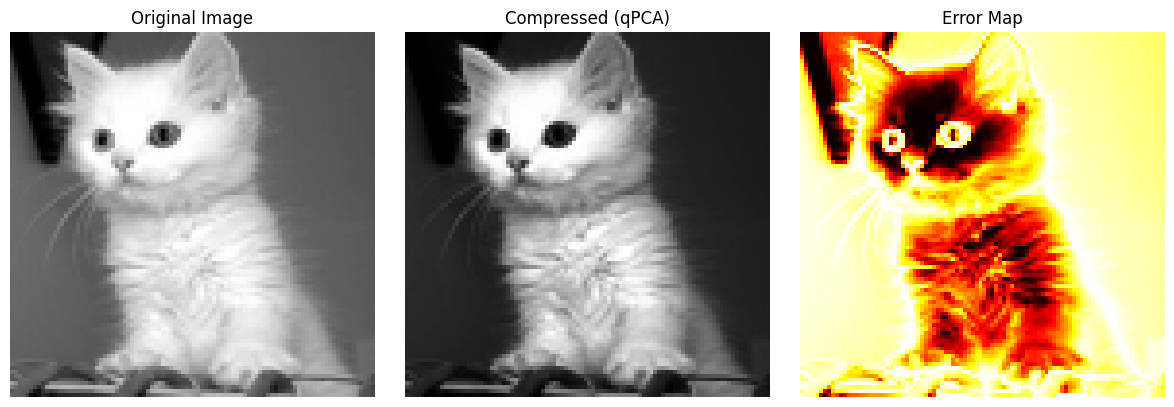

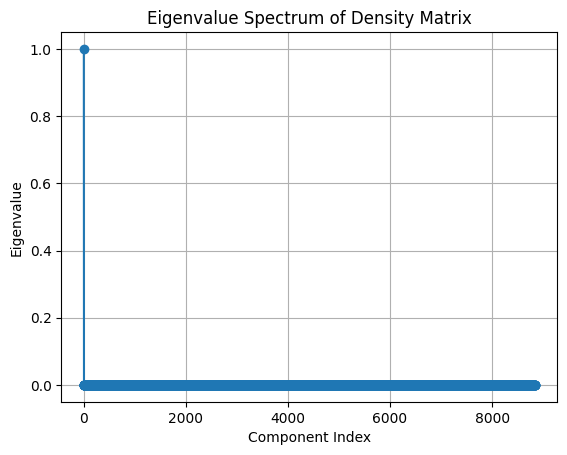

In [20]:
# Step 10: Plot images
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(original, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(compressed_image, cmap='gray')
axs[1].set_title("Compressed (qPCA)")
axs[1].axis('off')

axs[2].imshow(error, cmap='hot')
axs[2].set_title("Error Map")
axs[2].axis('off')

plt.tight_layout()
plt.savefig("qPCA_compression_result.png")
plt.show()

# Step 11: Plot eigenvalue spectrum
plt.figure()
plt.plot(eigvals, 'o-')
plt.title("Eigenvalue Spectrum of Density Matrix")
plt.xlabel("Component Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

94, 94 means 94x94 = 8836

which means a total of 8836 pixel intensities and that much calculations will be done by computing machine.

more enhanced version of image means better compression quality but higher computational cost (high powered cpu or gpu and high number of ram which can exceed to around 512gb to 2 tb and more) if pixel intensities not perfectly set during the runtime of the algorithm.